In [51]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/sumitprakashdubey/Logistic-Regression/refs/heads/main/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
len(df)

891

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

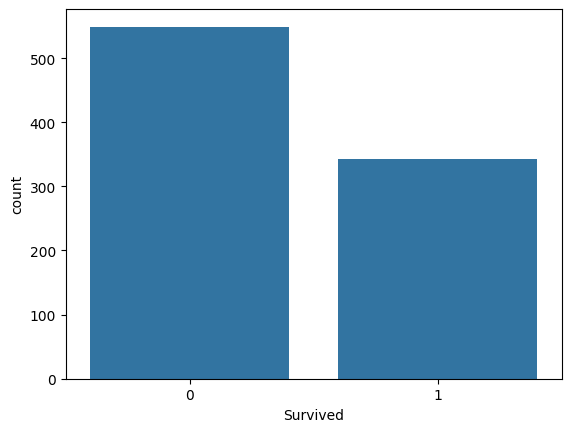

In [54]:
sns.countplot(x='Survived',data=df)

In [55]:
# Checking for null values

#df.isnull().sum()
#or
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

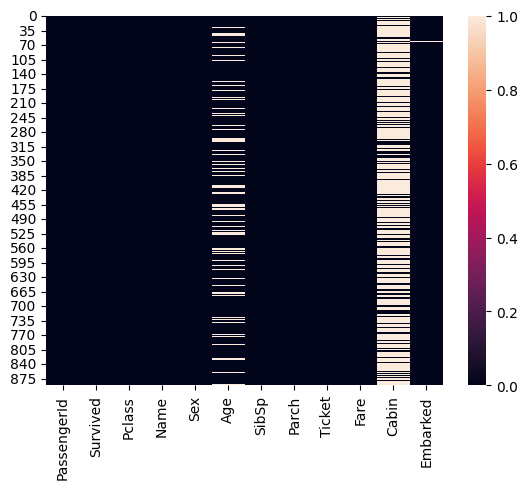

In [56]:
sns.heatmap(df.isna())

In [57]:
# To get percentage of null values
df['Age'].isna().sum()/len(df['Age'])*100

np.float64(19.865319865319865)

In [58]:
df['Cabin'].isna().sum()/len(df['Cabin'])*100

np.float64(77.10437710437711)

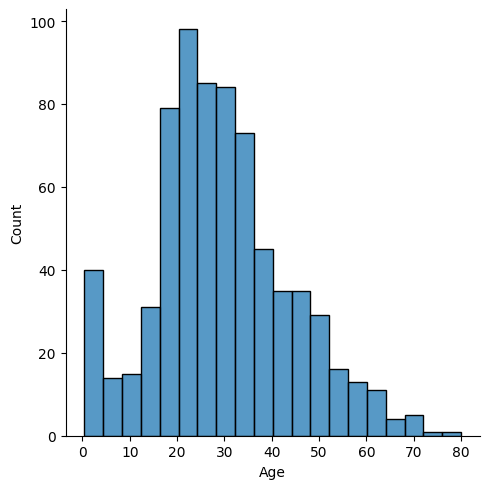

In [59]:
# for finding the distrbution for the age column
sns.displot(x='Age',data=df)

# Data cleaning

In [60]:
df['Age'].mean()

np.float64(29.69911764705882)

In [61]:
df['Age']=df['Age'].fillna(df['Age'].mean())

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [63]:
# converting sex to numerical
temp=pd.get_dummies(df['Sex'],drop_first=True)
df['Gender']=temp.astype(int)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,1


In [64]:
df.drop(['Name','Sex','Ticket','Cabin','Embarked','PassengerId'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,0,3,22.000000,1,0,7.2500,1
1,1,1,38.000000,1,0,71.2833,0
2,1,3,26.000000,0,0,7.9250,0
3,1,1,35.000000,1,0,53.1000,0
4,0,3,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1
887,1,1,19.000000,0,0,30.0000,0
888,0,3,29.699118,1,2,23.4500,0
889,1,1,26.000000,0,0,30.0000,1


In [65]:
X=df.drop(columns='Survived')
y=df['Survived']

# Data modeling or Fitting

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [67]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

# Evaluation

The accuracy of this model : 0.82

The Classification Report matrix

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       175
           1       0.82      0.72      0.76       120

    accuracy                           0.82       295
   macro avg       0.82      0.80      0.81       295
weighted avg       0.82      0.82      0.82       295


The Confusion matrix

[[156  19]
 [ 34  86]]

Visual represention


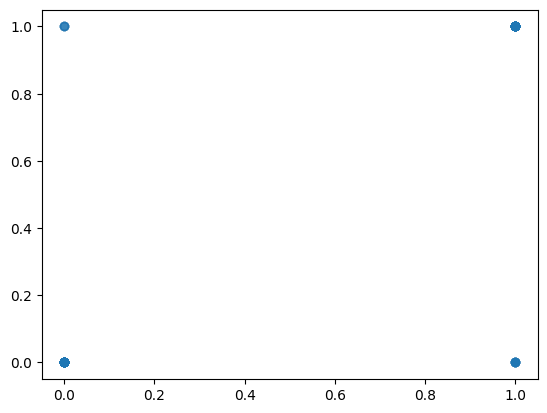

In [68]:
'''
Key metrics for Classification report:

    Precision: The ratio of correctly predicted positive observations to the total predicted positives. 
    It indicates how accurate the positive predictions are.
  
    Recall: The ratio of correctly predicted positive observations to all observations in the actual class. 
    It indicates how well the model can identify positive observations.
  
    F1-score: The weighted average of precision and recall. It gives a balance between precision and recall.
   
    Support: The number of true instances for each label in the dataset.
'''
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(f"The accuracy of this model : {accuracy_score(y_test,y_pred):.2f}")
print("\nThe Classification Report matrix\n")
print(classification_report(y_test,y_pred))
print("\nThe Confusion matrix\n")
print(confusion_matrix(y_test,y_pred))
print("\nVisual represention")
import matplotlib.pyplot as plt
plt.scatter(y_test,y_pred,alpha=0.1)

In [76]:
tempa=pd.DataFrame(confusion_matrix(y_test,y_pred),columns=['Predicted No','Predicted Yes'],index=['Actual No','Actual Yes'])
tempa

,Predicted No,Predicted Yes
Actual No,156,19
Actual Yes,34,86


In [ ]:
'''
True Positives (TP) will be at the intersection of Actual Yes and Predicted Yes.
True Negatives (TN) will be at the intersection of Actual No and Predicted No.
False Positives (FP) will be at the intersection of Actual No and Predicted Yes.
False Negatives (FN) will be at the intersection of Actual Yes and Predicted No.

'''